# Homework 1
## Econ 1680: MLTA and Econ

#### Name: Garv Gaur

In this course we will be using Python for writing code to apply machine learning and text analysis methods to economics topics. Python is free, flexible, offers a variety of predefined packages, and is popular. It can handle everything from the statistical analysis of Stata to the matrix algebra and simulation of Matlab.

This assignment is meant to introduce you to how we will be using Python in this course. For this assignment, you should write/type your answers into this worksheet. You may discuss the problem set with your class mates, but every student must do their own work. 

It is always important to cite our references that help us in our work. Please list the students you work with here:

1\. 

2\.

3\.


## I. PRELIMINARIES 

Preliminaries are listed in the HW1 Assignment on Canvas. It includes the following:

* Downloading and installing Python/Anaconda

* Installing necessary pacakges for the homework assignment

* Setting up your GitHub account for keeping track of your work

* How to sumbit your homework assignment and code 

## II.	NUMERICAL DATA 

### 1. Zillow Data

Access Zillow Real Estate Data using the Nasdaq Data Link API. Nasdaq Data Link is a dataset aggregation website that also has other economics datasets. These types of websites can make it easier to get data and to explore what types of datasets are available. 
    
- Set up free account with Nasdaq Data Link (https://data.nasdaq.com/). Find your API Key in your Account Settings. You will need this to download the data.

- Find the “Zillow Real Estate Data” that is Free (https://data.nasdaq.com/databases/ZILLOW/data) This will be the data you will download.

- Click on the “Usage” tab, then select the “Python” sub-tab for instructions on using the Nasdaq Data Link API.

- To decide which variables and regions we want to download data for, we will first download information on the indicators and regions. In a python environment, you will run the code above to import packages, setup your API connection, and download the indicator and region dataframes:

In [1]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Change the API key to yours
nasdaqdatalink.ApiConfig.api_key = 'WEbwnsLprrT9VWcqjbVg'
df_zillow_indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS', paginate=True)
df_zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS', paginate=True)

#### 1a. What does ZHVI in the indicator descriptions stand for? 

Answer: ZHVI stands for Zillow Home Value Index (https://www.zillow.com/research/data/).

#### 1b. What is the indicator, description, and category of row 38 in df_zillow_indicators? 

Hint: use `.iloc[]` 

Answer: The indicator is LRAW, with description Median List Price (Raw, All Homes, Weekly View). The category is Inventory and Sales.

In [2]:
# Write the code you need (if any) to answer the questions above
# Get all indicators containing 'ZHVI'
print(df_zillow_indicators.loc[df_zillow_indicators['indicator'].str.contains('ZHVI')])

# Get row 38 of INDICATORS
print(df_zillow_indicators.iloc[38])

     indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5            Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6            Z4BR                     ZHVI 4-Bedroom Time Series ($)   
7            Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8            Z2BR                     ZHVI 2-Bedroom Time Series ($)   
9            Z1BR                     ZHVI 1-Bedroom Time Series ($)   

         category  
None               
0     Home values  
1     Home values  
2     Home values  
3     Home values  
4     Home valu

#### 1c. In df_zillow_regions, how many regions are there when you search for “Providence;RI”? What is the region_id number for Providence, RI? 

Hint: use `.str.contains('Providence;RI')` 

Answer: There are 4 regions when we search for "Providence;RI". Providence, RI has a region_id number of 26637.

In [3]:
# Write the code you need (if any) to answer the questions above
# Get all regions containing 'Providence;RI'
contains_prov = df_zillow_regions.loc[df_zillow_regions['region'].str.contains('Providence;RI')]
print(contains_prov)
print(len(contains_prov))

      region_id region_type                                             region
None                                                                          
52365      4488        city  East Providence;RI;Providence-Warwick, RI-MA;P...
57533     40069        city  North Providence;RI;Providence-Warwick, RI-MA;...
72116    271242       neigh  Lower South Providence;RI;Providence-Warwick, ...
74508     26637        city  Providence;RI;Providence-Warwick, RI-MA;Provid...
4


#### 1d. Download a dataframe the city of Providence, RI on ZHVI Single-Family Home values with the correct indicator and region IDs entered using the following line:

In [4]:
df_zillow_sfh = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZSFH' , region_id='26637',paginate=True)

### 2. Descriptive statistics 

#### 2a. What is the data frequency in df_zillow_sfh? 

Answer: The data is recorded monthly.


#### 2b. What is the median dollar value of a home in df_zillow_sfh? 

Answer: The median dollar value of a home in df_zillow_sfh is $162,415.48.


#### 2c. What is the median dollar value of a home in df_zillow_sfh for the year of 2020? 

Answer: The median dollar value of a home in df_zillow_sfh in 2020 is $253,457.26.

Hint: use  `[df_zillow_sfh['date'].dt.year==2020]`

In [5]:
# Write the code you need (if any) to answer the questions above
# Get time values for df_zillow_sfh
print(df_zillow_sfh['date'])
# Get median of value column
print(df_zillow_sfh['value'].median())
# Get median of value column where year == 2020
df_zillow_sfh_2020 = df_zillow_sfh.loc[df_zillow_sfh['date'].dt.year == 2020]
print(df_zillow_sfh_2020['value'].median())

None
0     2023-12-31
1     2023-11-30
2     2023-10-31
3     2023-09-30
4     2023-08-31
         ...    
331   1996-05-31
332   1996-04-30
333   1996-03-31
334   1996-02-29
335   1996-01-31
Name: date, Length: 336, dtype: datetime64[ns]
162415.478015742
253457.2623749855


### 3. Visualize the Data

#### 3a. Plot a time series graph for values df_zillow_sfh. Be sure to title your graph and label your axes. 

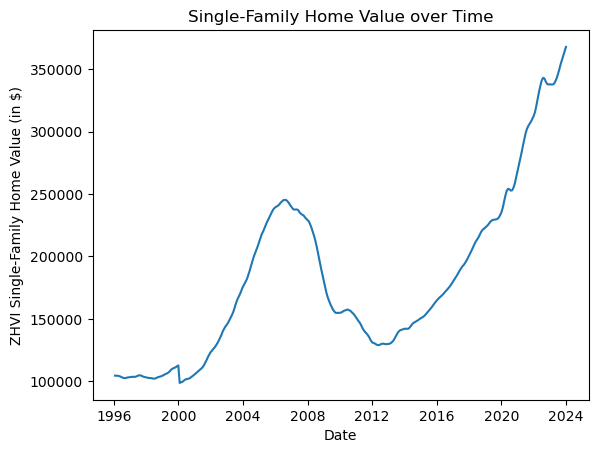

In [6]:
# Plot value over time
plt.plot(df_zillow_sfh['date'], df_zillow_sfh['value'])

# Label axes and title
plt.xlabel("Date")
plt.ylabel("ZHVI Single-Family Home Value (in $)")
plt.title("Single-Family Home Value over Time")

plt.show()

#### 3b. Plot time series graph for *yearly median* values df_zillow_sfh. Be sure to title your graph and label your axes. 

Hint: you will can create a new dataframe by creating a ‘year’ column using .dt.year and then use `.groupby(by=['year']).median(numeric_only=True)` to make a yearly dataframe. 

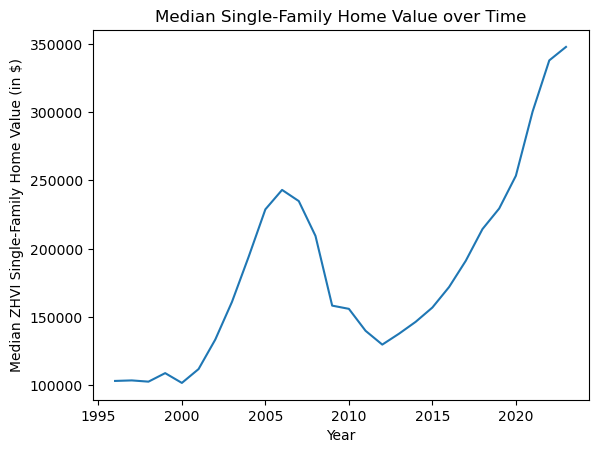

In [7]:
# Create year column and group by year
df_zillow_sfh['year'] = df_zillow_sfh['date'].dt.year
df_zsfh_yrmed = df_zillow_sfh.groupby(by=['year']).median(numeric_only=True)
df_zsfh_yrmed['year'] = df_zsfh_yrmed.groupby(by=['year']).groups.keys()

# Plot value over time
plt.plot(df_zsfh_yrmed['year'], df_zsfh_yrmed['value'])

# Label axes and title
plt.xlabel("Year")
plt.ylabel("Median ZHVI Single-Family Home Value (in $)")
plt.title("Median Single-Family Home Value over Time")

plt.show()

#### 3c. What looks different in these graphs? Why?

Answer: The second graph has less data entries and looks smoother, as it takes the median for each year. The frequency is yearly rather than monthly, and the impact of outlier months is diminished by taking the median, since the median takes into account the middle of the top and bottom 50% rather than averaging all the values (including outliers).


#### 3d. Describe the patterns in the graph. What does it say about the housing market in Providence, RI over time? In recent years? What additional data would you need to make claims about what is changing this price? 

Answer: The graph shows that median single family home price was stable from 1995-2000, increased from 2000-2007, decreased until 2012 (perhaps due to the 2008 Financial Crisis and accompanying housing market crash), and increased once again until the present. Housing prices have been skyrocketing in recent years. We would need information on individuals' income to see if this is inflationary pressure caused by an increase in nominal income. We could also see if more people are attempting to buy houses (i.e. data regarding demand), which could point toward higher competition for buyers of houses.

## III	TEXT DATA 

### 4. US News Data
Download US Economic News Dataset from Kaggle.com: Sign up for a free account with Kaggle.com. This website hosts data science competitions and often has cool datasets available for download. We will be using the US Economic News Dataset at https://www.kaggle.com/heeraldedhia/us-economic-news-articles. Download the CSV file from the website by clicking “Download.”
     
Load a subset of the data into Jupyter/Spyder/Python: Sometimes you may be working with a large dataset and it is therefore important to understand how to load a subset of the data at a time. The US Economic News dataset has 8,000 observations.

#### 4a. Run the code below and explain in words each of the lines of code with comments (use # to comment): 

In [8]:
import os
import csv

# This variable contains my local folder path that has the .csv
folder_path = 'C:\\Users\\garvg\\OneDrive\\Documents\\GitHub\\ECON1680-Sp24\\Homework\\HW 1\\'

# Open US-Economic-News.csv in read mode using the local filepath, using the unicode text encoding
fileReader = open(os.path.join(folder_path, "US-Economic-News.csv"), "r", encoding="unicode_escape")
# Create a reader object that will read the open .csv file
csvReader = csv.reader(fileReader)

# Open a new file that will contain a subset of the .csv in write mode and use an empty string to signal a new line
fileWriter = open(os.path.join(folder_path, "Subset_US_Economic_News.csv"), "w", encoding="unicode_escape", newline='')
# Create a writer object that will write to the subset file
csvWriter = csv.writer(fileWriter)

# Get the first row of US-Economic-News.csv (column headers) and write it to the subset file
acHeader = next(csvReader)
csvWriter.writerow(acHeader)

# Read the first 800 rows from US-Economic-News.csv and write them to the subset file 
for index, acRow in enumerate(csvReader):
    if index < 800:
        csvWriter.writerow(acRow)

# Close US-Economic-News.csv and subset.csv, since we are done reading and writing to them
fileReader.close()
fileWriter.close()

# Read the subset .csv and create a dataframe out of it, converting the date column to datetime objects
df_news = pd.read_csv(os.path.join(folder_path,"Subset_US_Economic_News.csv"), encoding='unicode_escape')
df_news['date'] = pd.to_datetime(df_news['date'])

C:\Users\garvg\AppData\Local\Temp\ipykernel_28296\110746873.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_news['date'] = pd.to_datetime(df_news['date'])


#### 4b.  What code would you write to keep only the ‘date’, ‘headline’, and ‘text’ columns in the dataframe? Write and run that code: 

In [9]:
# Only keep date, headline, and text columns
df_news = df_news[['date', 'headline', 'text']]

### 5. String Extraction

This dataframe is full of text data about US Economic News. When we try to extract information from text, formatting of words and string in code is very important.

#### 5a. Count the number of headlines that have ‘US’ in them. 

Hint: loop over `df_news[‘headlines’]`. 

Answer: There is 1 headline, "US Jobless Claims Disappoint" with "US" in it.


In [10]:
# Sum variable
num_with_US = 0

# For each headline, check if it has "US"--if it does, increment sum variable
for headline in df_news['headline']:
    if "US" in headline:
        print(headline)
        num_with_US += 1
print('There are', num_with_US, 'headlines with "US" in them.')

US Jobless Claims Disappoint
There are 1 headlines with "US" in them.


#### 5b. Count the number of headlines that have ‘us’ in them.

Answer: There are 143 headlines with "us" in them.


In [11]:
# Sum variable
num_with_us = 0

# For each headline, check if it has "us"--if it does, increment sum variable
for headline in df_news['headline']:
    if "us" in headline:
        # print(headline)
        num_with_us += 1
print('There are', num_with_us, 'headlines with "us" in them.')

There are 143 headlines with "us" in them.


#### 5c. Why are these counts different? 

Hint: tell python to check if ‘us’ is in the string ‘trust’. Then tell python to check if ‘ us ‘ is in the string ‘trust’. 

Answer: These counts are different because Python will treat any occurrence of the letters 'u' and 's' in sequence as an occurrence of "us", even in the middle of words.


In [12]:
# Check if "us" is in "trust", then check if " us " is in "trust"
print("us" in "trust")
print(" us " in "trust")

True
False


### 6. Annotate Text Processing Code

In text analysis, we will need to perform a few tasks to clean the data to prepare it for consistent analysis. 

#### 6a. Run the code and explain what each line does as comments (use # to comment): 

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Create a set of English stopwords from nltk data 
stops = set(stopwords.words('english'))

# Specify punctuation to be replaced with an empty string later
table_punctuation = str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') 

# For each row in df_news['text']:
#   remove punctuation, split into words, remove stopwords, and make words lowercase
# Insert list of tokens into token_list 
token_list = []
for i, row in enumerate(df_news['text']):
    text = row.translate(table_punctuation)
    tokens = [word.lower() for word in nltk.tokenize.word_tokenize(text) if word.lower() not in stops]
    token_list.append(tokens)

# Insert token lists into data frame in rows with associated text 
df_news['tokens'] = token_list

# Create word list with words relevant to monetary policy
monetary_policy_wordlist = ['monetary', 'fed ', 'federal reserve', 'Federal Reserve', 'Monetary']

# For each row in df_news['text']: 
#    tally the number that have words in the monetary_policy_wordlist
#    create column 'monetary_flag' and set to 1 if the row has a word in the wordlist
tally = 0
monetary_text = []
for row in df_news['text']:
    mon = 0
    if any(keyword in row for keyword in monetary_policy_wordlist):
        tally += 1
        mon = 1
    monetary_text.append(mon)
print(tally)
df_news['monetary_flag'] = monetary_text

# Create dataframe monetarynews containing articles that have words in the wordlist
# Create dataframe nonmonetarynews containing all other articles
df_monetarynews = df_news[df_news['monetary_flag']==1]
df_nonmonetarynews = df_news[df_news['monetary_flag']!=1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garvg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garvg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


236


### 7. Compare Monetary News

Compare and contrast the news articles about monetary policy in the US and those about non-monetary-policy economics in the US.

#### 7a. Adapt the below code to answer the subsequent questions (i-iii)
```python
# This code calculates the top 30 most common words in df_news. 
from collections import Counter
top_N = 30
words = [word for tokenlist in df_news['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)
```

#### 7a.i. What are the 15 most common words from df_monetarynews?

Answer: The 15 most common words are federal, fed, said, rates, us, reserve, interest, economy, rate, new, market, inflation, prices, bank, and economic.


In [14]:
# This code calculates the top 15 most common words in df_monetarynews. 
from collections import Counter
top_N = 15
words = [word for tokenlist in df_monetarynews['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)

           Count
Word            
federal      284
fed          270
said         254
rates        252
us           245
reserve      226
interest     217
economy      184
rate         179
new          177
market       162
inflation    156
prices       150
bank         145
economic     139


#### 7a.ii. What are the 15 most common words from df_nonmonetarynews?

Answer: The 15 most common words are said, us, new, market, year, stock, billion, economic, investors, would, million, prices, last, rates, and one.


In [15]:
# This code calculates the top 15 most common words in df_nonmonetarynews. 
top_N = 15
words = [word for tokenlist in df_nonmonetarynews['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)

           Count
Word            
said         516
us           504
new          433
market       433
year         403
stock        366
billion      318
economic     280
investors    269
would        249
million      247
prices       247
last         228
rates        209
one          204


#### 7a.iii. What differences do you notice?

Answer: The monetary news contains more reference to the Federal Reserve and other monetary terms such as Fed, interest, inflation, and banks. We see the use of more technical language here. The non monetary news also contains references to economic terms, but refers more to words like investors and stock market. It also contains more numbers like million and billion.

#### 7b. Visualize the word use in the different types of articles using a word cloud. Below is the code for making the word cloud for the df_news dataframe. You must adapt it to the other dataframes: 
```python
from wordcloud import WordCloud
allwords = ' '.join(words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Economics Articles')
plt.show()
``` 
    
i. What is the word cloud for df_monetarynews? (3 points)

ii. What is the word cloud df_nonmonetarynews? (3 points)      

iii. What differences do you notice? Do these differences seem consistent with your list of top 15 most common words? (1 points)

#### 7b.i. What is the word cloud for df_monetarynews?


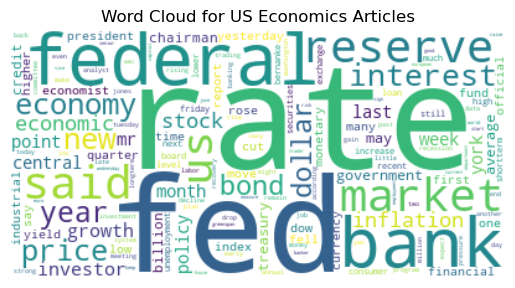

In [16]:
from wordcloud import WordCloud

# Word cloud for monetary news
words = [word for tokenlist in df_monetarynews['tokens'].tolist() for word in tokenlist]
allwords = ' '.join(words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Economics Articles')
plt.show()

#### 7b.ii. What is the word cloud for df_nonmonetarynews?


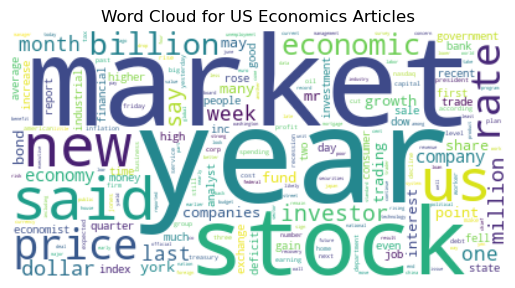

In [17]:
# Word cloud for non monetary news
words = [word for tokenlist in df_nonmonetarynews['tokens'].tolist() for word in tokenlist]
allwords = ' '.join(words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Economics Articles')
plt.show()

#### 7b.iii. What differences do you notice? Do these differences seem consistent with your list of top 15 most common words?

Answer: We notice that monetary news contains more references to banks, bonds, the Federal Reserve, and a variety of rates such as inflation and interest. The nonmonetary news contains more information on broader concepts such as the stock market, prices, investors, and relatively more references to the US. These differences are largely consistent with the differences between the lists of top 15 most common words.


### 8. Monetary Uncertainty in the News: 

Loughran and McDonald (2011) have created a commonly used bank of word-sentiment lists. One list is a list of “uncertainty words.” You can find this dataset in the Github HW1 Repository. 

The following is code to make a Monetary Uncertain Score from df_monetarynews and to plot the figure over time. However, there are three things wrong with in the code.

#### 8a. Identify the typos, run the correct code, and insert the graph below. 

HINT: Run the code line by line and manually view the objects that were created and/or the error codes that appear.

Answer: The three typos are
1. In line 14:
```python
uncertainty_score.append(u_tally))
```
We need to add one level of indentation so u_tally is appended to uncertainty_score for each row.
```python
    uncertainty_score.append(u_tally))
```
2. In line 22:
```python
df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).average()
```
We need to use .mean(numeric_only=True) instead of .average() to get the mean over numeric columns by year.
```python
df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).mean(numeric_only=True)
```
3. In line 27:
```python
plt.plot(df_monetarynews_yearly['year'], df_monetarynews['text_uncertainty_score'])
```
We need to use the values from df_monetarynews_yearly['text_uncertainty_score'], since those are the aggregated means.
```python
plt.plot(df_monetarynews_yearly['year'], df_monetarynews_yearly['text_uncertainty_score'])
```

C:\Users\garvg\AppData\Local\Temp\ipykernel_28296\1807148043.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['text_uncertainty_score'] = uncertainty_score
C:\Users\garvg\AppData\Local\Temp\ipykernel_28296\1807148043.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['year'] = df_monetarynews['date'].dt.year.astype(str)


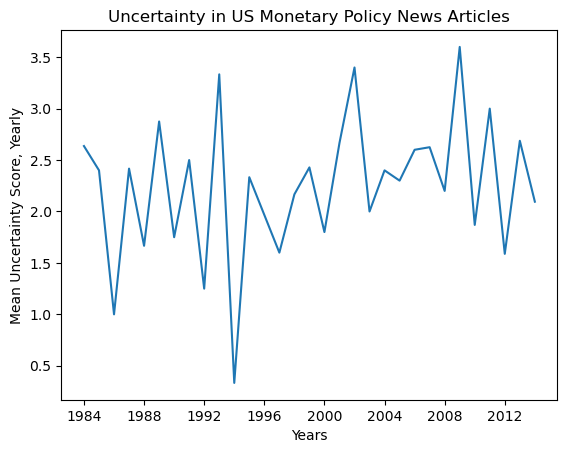

In [18]:
folder_path = 'C:\\Users\\garvg\\OneDrive\\Documents\\GitHub\\ECON1680-Sp24\\Homework\\HW 1\\'

# Word Lists
uncertainty_wordlist_LM = pd.read_csv(os.path.join(folder_path, "LM_Uncertainty.csv"), encoding='utf-8')
uncertainty_wordlist_LM = uncertainty_wordlist_LM['uncertain words'].tolist()

# Text Uncertainty Score for Each Article
uncertainty_score = []
for row in df_monetarynews['tokens']:
    u_tally = 0
    for word in uncertainty_wordlist_LM:
        if word in row:
            u_tally += 1
    uncertainty_score.append(u_tally)

df_monetarynews['text_uncertainty_score'] = uncertainty_score     

# Plot Yearly Mean Monetary Policy Uncertainty Over Time

# Take mean over years
df_monetarynews['year'] = df_monetarynews['date'].dt.year.astype(str)
df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).mean(numeric_only=True)

df_monetarynews_yearly['year'] = pd.to_datetime(df_monetarynews_yearly.index)

# Plot time Series
plt.plot(df_monetarynews_yearly['year'], df_monetarynews_yearly['text_uncertainty_score'])
plt.xlabel('Years')
plt.ylabel('Mean Uncertainty Score, Yearly')
plt.title('Uncertainty in US Monetary Policy News Articles')
plt.show()